# Определение перспективного тарифа для телеком компании. #


Представлены данные 500 пользователей федерального оператора сотовой связи Мегалайн за 2018 год. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, нужно определить на примере этой выборки данных, какой тариф приносит больше денег.

Тариф «Смарт»

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

#### Описание данных: ####

**Users:**

- user_id — уникальный идентификатор пользователя

- first_name — имя пользователя

- last_name — фамилия пользователя

- age — возраст пользователя (годы)

- reg_date — дата подключения тарифа (день, месяц, год)

- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

- city — город проживания пользователя

- tariff — название тарифного плана


**Calls:**

- id — уникальный номер звонка

- call_date — дата звонка

- duration — длительность звонка в минутах

- user_id — идентификатор пользователя, сделавшего звонок


**Messages:**

- id — уникальный номер сообщения

- message_date — дата сообщения

- user_id — идентификатор пользователя, отправившего сообщение


**Internet:**

- id — уникальный номер сессии

- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

- session_date — дата интернет-сессии

- user_id — идентификатор пользователя


**Tariffs:**

- tariff_name — название тарифа

- rub_monthly_fee — ежемесячная абонентская плата в рублях

- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

- messages_included — количество сообщений в месяц, включённых в абонентскую плату

- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

- rub_per_message — стоимость отправки сообщения сверх тарифного пакета

- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 1. Открыть файлы и просмотреть данные. ###

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import norm
#импопртировала библиотеки и методы для работы 

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [10]:
users = pd.read_csv('//datasets/users.csv')
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [12]:
calls.loc[:, 'call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet.loc[:, 'session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages.loc[:, 'message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users.loc[:, 'reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 
users.loc[:, 'churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') 

In [13]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

открыла файлы и рассмотрела данные, вижу пропуски в некоторых столбцах, плюс надо объединить таблицы чтобы рассматривать все как единый датасет.

In [14]:
#calls.columns = ['calls_id', 'call_date', 'duration', 'user_id']
calls.rename({'id': 'calls_id'}, inplace=True, axis=1)
calls.head()

,calls_id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [15]:
#messages.columns = ['message_id', 'message_date', 'user_id']
messages.rename({'id': 'message_id'}, inplace=True, axis=1)
messages.head()

,message_id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Переименовала столбцы с уникальными номерами звонков, смс и интернет сессии, чтобы их не спутать

In [16]:
#internet.columns = ['Unnamed: 0', 'internet_id', 'mb_used','session_date','user_id']
internet.rename({'id': 'internet_id'}, inplace=True, axis=1)
internet.head()

,Unnamed: 0,internet_id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


видим лишний столбец в таблице интернет, его надо убрать

In [17]:
internet = internet.drop(['Unnamed: 0'], axis='columns')

internet.head()

,internet_id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [18]:
#переименуем столбец tariff_name  на tariff в таблице tariffs
tariffs.rename({'tariff_name': 'tariff'}, inplace=True, axis=1)

In [19]:
#объединим тарифы с юзерами
users_tariffs = users.merge(tariffs, on='tariff')


In [20]:
#объединим табл users_tariffs сo звонками
calls_data = users_tariffs.merge(calls, on='user_id')


In [21]:
#собрали данные для СМСок
messages_data = users_tariffs.merge(messages, on='user_id')

In [22]:
internet_data = users_tariffs.merge(internet, on='user_id') #для интеренета

In [23]:
data = calls_data.append([messages_data, internet_data], sort = False)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475039 entries, 0 to 149395
Data columns (total 24 columns):
user_id                  475039 non-null int64
age                      475039 non-null int64
churn_date               23006 non-null datetime64[ns]
city                     475039 non-null object
first_name               475039 non-null object
last_name                475039 non-null object
reg_date                 475039 non-null datetime64[ns]
tariff                   475039 non-null object
messages_included        475039 non-null int64
mb_per_month_included    475039 non-null int64
minutes_included         475039 non-null int64
rub_monthly_fee          475039 non-null int64
rub_per_gb               475039 non-null int64
rub_per_message          475039 non-null int64
rub_per_minute           475039 non-null int64
calls_id                 202607 non-null object
call_date                202607 non-null datetime64[ns]
duration                 202607 non-null float64
month     

объединила все таблицы. Сначала юзеров и тарифы по созданному одинаковому столбцу, затем соединила их ее по очереди со звонками, сообщениями и интернетом в три отдельные таблицы.

### Шаг 2. Предобработка данных. ###

In [24]:
#найдем и обработаем пропуски в данных
for row in data:
    print(data[row].unique())

[1000 1003 1004 1013 1016 1018 1019 1021 1024 1028 1039 1048 1049 1050
 1053 1057 1060 1063 1078 1080 1081 1084 1085 1089 1090 1094 1096 1097
 1099 1104 1120 1122 1124 1126 1143 1148 1150 1151 1152 1156 1165 1166
 1167 1168 1180 1182 1185 1192 1196 1200 1201 1203 1208 1222 1225 1226
 1234 1240 1243 1245 1253 1254 1255 1257 1259 1265 1270 1271 1272 1273
 1276 1277 1281 1289 1292 1294 1300 1303 1304 1309 1310 1318 1325 1330
 1331 1333 1335 1336 1341 1343 1344 1346 1347 1348 1349 1350 1352 1356
 1360 1361 1363 1364 1367 1369 1375 1377 1379 1380 1381 1382 1385 1391
 1392 1396 1397 1399 1402 1403 1405 1412 1415 1416 1424 1430 1436 1440
 1442 1452 1453 1455 1458 1461 1463 1466 1467 1469 1471 1474 1476 1485
 1491 1493 1495 1001 1002 1005 1006 1007 1008 1009 1010 1011 1012 1014
 1015 1017 1020 1022 1023 1025 1026 1027 1029 1030 1031 1032 1033 1034
 1035 1036 1037 1038 1040 1041 1042 1043 1044 1045 1046 1047 1051 1052
 1054 1055 1056 1058 1059 1061 1062 1064 1065 1066 1067 1068 1069 1070
 1071 

In [27]:
data.isnull().sum()


user_id                       0
age                           0
churn_date               452033
city                          0
first_name                    0
last_name                     0
reg_date                      0
tariff                        0
messages_included             0
mb_per_month_included         0
minutes_included              0
rub_monthly_fee               0
rub_per_gb                    0
rub_per_message               0
rub_per_minute                0
calls_id                 272432
call_date                272432
duration                 272432
month                         0
message_id               352003
message_date             352003
internet_id              325643
mb_used                  325643
session_date             325643
dtype: int64

In [30]:
for row in data:
    print(data[row].value_counts())

1168    2849
1375    2832
1356    2822
1196    2723
1385    2699
        ... 
1242      91
1156      90
1117      79
1141      78
1397      71
Name: user_id, Length: 498, dtype: int64
53    18035
71    16341
42    13673
64    13598
26    13125
28    12425
40    12353
45    11277
65    11246
29    10817
23    10808
21    10590
37    10274
73    10157
63    10066
47     9914
51     9439
56     9232
70     9184
39     9005
30     8849
50     8788
36     8487
55     8374
48     8369
58     8303
44     8284
27     8272
19     8200
52     8165
75     8125
60     8040
68     8011
25     7698
62     7626
66     7618
20     7502
67     7436
41     7278
24     6539
69     6093
43     6009
59     6004
74     5728
35     5653
32     5258
31     5047
46     4991
18     4767
34     4585
33     4523
61     4127
54     4119
49     3906
38     3326
72     3308
57     3160
22     2912
Name: age, dtype: int64
2018-12-09    2069
2018-12-26    1447
2018-12-14    1333
2018-10-14    1319
2018-10-03    1268
2

Заменили типы данных на дату потому, что столбцы с датой должны иметь формат дата для дальнейшеф выборке по месяцам

In [34]:
#удалим нулевые значения в столбце duration ( так как даже секундный звонок система засчитывает как 1 минуту, 
#следовательно нулевые значения это пропущенные звонки, а их на мой взгляд не следует учитывать в анализе)
data.loc[data['duration']  == 0.00, 'duration'] = 1

data


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,...,rub_per_minute,calls_id,call_date,duration,month,message_id,message_date,internet_id,mb_used,session_date
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1,1000_0,2018-07-25,1.00,7,NaN,NaT,NaN,NaN,NaT
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1,1000_1,2018-08-17,1.00,8,NaN,NaT,NaN,NaN,NaT
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1,1000_2,2018-06-11,2.85,6,NaN,NaT,NaN,NaN,NaT
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1,1000_3,2018-09-21,13.80,9,NaN,NaT,NaN,NaN,NaT
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1,1000_4,2018-12-15,5.18,12,NaN,NaT,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149391,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,3,NaN,NaT,NaN,10,NaN,NaT,1499_152,318.90,2018-10-03
149392,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,3,NaN,NaT,NaN,12,NaN,NaT,1499_153,490.13,2018-12-14
149393,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,3,NaN,NaT,NaN,10,NaN,NaT,1499_154,0.00,2018-10-27
149394,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,3,NaN,NaT,NaN,11,NaN,NaT,1499_155,1246.32,2018-11-26


In [35]:
#в столбце с датой окончания использования много пропусков кот означают, 
#что человек еще пользуется, заменим эти значкния на сегодняшнюю дату
import datetime
data['churn_date'] = calls_data['churn_date'].fillna(value = datetime.datetime.now())


In [39]:
month_data = data.groupby(['user_id', 'month']).agg({'duration': 'sum',
                                                    'mb_used': 'sum',
                                                    'message_id': 'count'})

In [40]:
month_data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

,user_id,month,duration,mb_used,message_id
0,1000,5,155.06,2253.49,22
1,1000,6,173.90,23233.77,60
2,1000,7,324.80,14003.64,75
3,1000,8,399.87,14055.93,81
4,1000,9,452.14,14568.91,57
...,...,...,...,...,...
3209,1498,10,243.63,20579.36,42
3210,1499,9,65.65,1845.75,11
3211,1499,10,453.91,17788.51,48
3212,1499,11,588.50,17963.31,59


In [43]:
#объединяю таблицу со всеми данными и звонках и таблицу где посчитано сколько звонков и минут потрачено
month_data_spent = month_data.merge(users_tariffs, on='user_id', how='outer')
calls_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_id,call_date,duration,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_0,2018-07-25,0.00,7
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_1,2018-08-17,0.00,8
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_2,2018-06-11,2.85,6
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_3,2018-09-21,13.80,9
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_4,2018-12-15,5.18,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202602,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_215,2018-12-26,0.76,12
202603,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_216,2018-10-18,18.83,10
202604,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_217,2018-11-10,10.81,11
202605,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_218,2018-10-06,4.27,10


In [46]:
#добавим столбцы с перерасходом по деньгам по звонкам, смс и трафику
month_data_spent['calls_revenue'] = ((month_data_spent['duration'] - month_data_spent['minutes_included']) * month_data_spent['rub_per_minute'])
month_data_spent

,user_id,duration,mb_used,message_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue
0,1000,155.06,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2844.94
1,1000,173.90,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2826.10
2,1000,324.80,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2675.20
3,1000,399.87,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2600.13
4,1000,452.14,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2547.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,453.91,17788.51,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,-138.27
3212,1499,588.50,17963.31,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,265.50
3213,1499,478.16,13055.58,66.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,-65.52
3214,1128,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,NaN


In [47]:
month_data_spent['messages_revenue'] = ((month_data_spent['message_id'] - month_data_spent['messages_included']) * month_data_spent['rub_per_message'])
month_data_spent

,user_id,duration,mb_used,message_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue
0,1000,155.06,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2844.94,-978.0
1,1000,173.90,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2826.10,-940.0
2,1000,324.80,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2675.20,-925.0
3,1000,399.87,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2600.13,-919.0
4,1000,452.14,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-2547.86,-943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,453.91,17788.51,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,-138.27,-6.0
3212,1499,588.50,17963.31,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,265.50,27.0
3213,1499,478.16,13055.58,66.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,-65.52,48.0
3214,1128,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,NaN,NaN


In [48]:
month_data_spent['internet_revenue'] = (((month_data_spent['mb_used'] - month_data_spent['mb_per_month_included']) * (month_data_spent['rub_per_gb']) / 1024))
month_data_spent

,user_id,duration,mb_used,message_id,age,churn_date,city,first_name,last_name,reg_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue
0,1000,155.06,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,1000,30720,3000,1950,150,1,1,-2844.94,-978.0,-4169.898926
1,1000,173.90,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,1000,30720,3000,1950,150,1,1,-2826.10,-940.0,-1096.615723
2,1000,324.80,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,1000,30720,3000,1950,150,1,1,-2675.20,-925.0,-2448.685547
3,1000,399.87,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,1000,30720,3000,1950,150,1,1,-2600.13,-919.0,-2441.025879
4,1000,452.14,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,1000,30720,3000,1950,150,1,1,-2547.86,-943.0,-2365.882324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,453.91,17788.51,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,...,50,15360,500,550,200,3,3,-138.27,-6.0,474.318359
3212,1499,588.50,17963.31,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,...,50,15360,500,550,200,3,3,265.50,27.0,508.458984
3213,1499,478.16,13055.58,66.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,...,50,15360,500,550,200,3,3,-65.52,48.0,-450.082031
3214,1128,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,...,1000,30720,3000,1950,150,1,1,NaN,NaN,NaN


In [49]:
#заменим пропуски в столбцах на нули
month_data_spent['duration'] = month_data_spent['duration'].fillna(0)
month_data_spent['message_id'] = month_data_spent['message_id'].fillna(0)

Получилось много отрицательных значений, то есть люди ничего не перерасходовали из пакета, значит отрицательные значения в столбцах с перерасходом надо превратить в нули

In [50]:
month_data_spent['calls_revenue'] = month_data_spent['calls_revenue'].clip(lower = 0)
month_data_spent['messages_revenue'] = month_data_spent['messages_revenue'].clip(lower = 0)
month_data_spent['internet_revenue'] = month_data_spent['internet_revenue'].clip(lower = 0)

In [52]:
month_data_spent.sample(10)
#все заменилось как надо

,user_id,duration,mb_used,message_id,age,churn_date,city,first_name,last_name,reg_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue
1857,1292,258.82,33988.88,0.0,63,NaT,Красноярск,Веселина,Алексеенко,2018-02-21,...,1000,30720,3000,1950,150,1,1,0.0,0.0,478.839844
2572,1401,336.76,10710.66,49.0,42,NaT,Москва,Владислава,Васильева,2018-01-24,...,50,15360,500,550,200,3,3,0.0,0.0,0.000000
2620,1409,499.42,9599.75,17.0,42,NaT,Набережные Челны,Даниил,Алиев,2018-03-14,...,50,15360,500,550,200,3,3,0.0,0.0,0.000000
226,1035,480.72,11770.04,54.0,37,NaT,Тюмень,Розалия,Аракина,2018-04-03,...,50,15360,500,550,200,3,3,0.0,12.0,0.000000
1043,1165,132.80,21893.34,107.0,19,NaT,Самара,Алексей,Медведев,2018-10-14,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000
676,1106,0.00,21934.03,23.0,67,NaT,Калуга,Исаак,Костин,2018-04-26,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000
1501,1238,163.21,18806.02,23.0,57,NaT,Ростов-на-Дону,Радислав,Наумов,2018-01-08,...,50,15360,500,550,200,3,3,0.0,0.0,673.050781
1031,1162,249.38,15363.74,0.0,63,NaT,Москва,Марта,Минаева,2018-10-09,...,50,15360,500,550,200,3,3,0.0,0.0,0.730469
64,1009,310.55,14709.22,14.0,24,NaT,Пермь,Василиса,Блинова,2018-03-22,...,50,15360,500,550,200,3,3,0.0,0.0,0.000000
912,1145,390.62,12991.35,99.0,45,NaT,Тюмень,Юлий,Алешин,2018-04-11,...,50,15360,500,550,200,3,3,0.0,147.0,0.000000


In [53]:
month_data_spent.describe()

,user_id,duration,mb_used,message_id,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue
count,3216.000000,3216.000000,3214.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3214.000000,3214.000000,3214.000000
mean,1251.588930,437.936269,17207.612859,38.257463,46.643968,341.262438,20069.253731,1266.480100,979.228856,184.670398,2.386816,2.386816,73.970787,12.067206,406.946444
std,144.645928,234.751312,7570.958771,36.149684,16.581233,438.092669,7083.266729,1152.875444,645.610249,23.057509,0.922300,0.922300,199.483589,34.526748,647.482348
min,1000.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1125.000000,274.377500,12491.890000,9.000000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1253.000000,430.450000,16943.175000,30.000000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000
75%,1378.250000,571.722500,21424.625000,57.000000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,0.000000,0.000000,679.962402
max,1499.000000,1632.060000,49745.690000,224.000000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,2670.660000,279.000000,4529.775391


In [55]:
#добавим столбец, где просуммируем расходы сверх тарифа + плату за тариф
month_data_spent['revenue'] = month_data_spent['rub_monthly_fee'] + month_data_spent['calls_revenue'] + month_data_spent['messages_revenue'] + month_data_spent['internet_revenue']
month_data_spent.head(10)

,user_id,duration,mb_used,message_id,age,churn_date,city,first_name,last_name,reg_date,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue,revenue
0,1000,155.06,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
1,1000,173.90,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
2,1000,324.80,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
3,1000,399.87,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
4,1000,452.14,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
5,1000,341.45,14702.49,73.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
6,1000,325.04,14756.47,58.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
7,1000,320.98,9817.61,70.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,...,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
8,1001,422.12,18429.34,0.0,41,NaT,Москва,Иван,Ежов,2018-11-01,...,15360,500,550,200,3,3,0.0,0.0,599.480469,1149.480469
9,1001,407.34,14036.66,0.0,41,NaT,Москва,Иван,Ежов,2018-11-01,...,15360,500,550,200,3,3,0.0,0.0,0.000000,550.000000


In [56]:

month_data_spent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
user_id                  3216 non-null int64
duration                 3216 non-null float64
mb_used                  3214 non-null float64
message_id               3216 non-null float64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
calls_revenue            3214 non-null float64
messages_

In [57]:
month_data_spent['revenue'] = month_data_spent['revenue'].fillna(value = 0)

Теперь посчитаны все расходы абонентов по всем видам связи, учитывая помесячную оплату тарифа и перерасход минут, смс и трафика по пакетам, сохранено в столбце revenue

Вывод:

Сгруппировали данные из разных таблиц по удобному принципу рассмотрения, изменили типы данных.

Выделили данные пользователей за месяц, сколько чего они тратят.

Посчитали, есть ли у них перерасход по пакетам, если он есть, то умножали его на цену за единицу.

Посчитали, сколько всего компания получает дохода с клиента, суммировав все их перерасходы по всем видам связи и базовую плату за тариф, все это сохранили в соответствующем столбце и добавила к таблице.

Принцип начальной группировки:

Сначала группировали юзеры+тарифы (создала у них для этого единый столбец user_id), затем эту таблицу поочередно объединяли, методом merge со звонками, смс и интернетом по тому же столбцу, получилось 3 таблицы, их сшили по вертикали в одну.

In [58]:
#выведем, сколько дохода приносит каждый тариф в отдельности
tariff_income = month_data_spent.pivot_table(index = ['tariff'], values = ['calls_revenue', 'messages_revenue', 'internet_revenue', 'revenue'], aggfunc=['sum'])


In [59]:
over = month_data_spent.pivot_table(index='user_id', values=['duration', 'message_id', 'mb_used', 'revenue'], aggfunc='sum')
for user_id in users['user_id']:
    over.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']

In [60]:
tariff_income

sum                                                
       calls_revenue internet_revenue messages_revenue       revenue
tariff                                                              
smart      237742.11     1.199705e+06          38784.0  2.702181e+06
ultra           0.00     1.082209e+05              0.0  2.028971e+06

In [61]:
over

,duration,mb_used,message_id,revenue,tariff
user_id,,,,,
1000,2493.24,107392.31,496.0,15600.000000,ultra
1001,829.46,32466.00,0.0,1699.480469,smart
1002,1475.17,116036.52,70.0,6680.361328,smart
1003,3692.52,57280.64,380.0,9750.000000,ultra
1004,958.21,149039.48,1192.0,15600.000000,ultra
...,...,...,...,...,...
1495,3787.57,127410.56,340.0,11297.860840,ultra
1496,5822.37,270942.29,468.0,26968.267813,smart
1497,1369.68,45574.97,51.0,2625.341562,smart


Вывели  отдельно сколько денег приходит с каждого тарифа. Видим, что на тарифе ультра абоненты выходят за пределы трафика только по интернету, при этом в тарифе смарт, превышают по всем видам связи, чаще всего тоже по трафику интенета.

In [62]:
# сохраним пользователей тарифов в две отдельные переменные
all_smart = month_data_spent[(month_data_spent['tariff'] == 'smart')]

In [63]:
all_ultra = month_data_spent[(month_data_spent['tariff'] == 'ultra')]

In [64]:
# создадим  таблицs с суммами минут, смс и мб трафика для каждого пользователя в месяц для каждого тарифа
smart_data = all_smart.groupby(['user_id']).agg({'duration': 'sum',
                                                    'mb_used': 'sum',
                                                    'message_id': 'sum'})

In [65]:
smart_data

,duration,mb_used,message_id
user_id,,,
1001,829.46,32466.00,0.0
1002,1475.17,116036.52,70.0
1005,6409.65,99687.31,552.0
1006,3383.36,164188.81,0.0
1007,4270.47,131625.67,225.0
...,...,...,...
1494,1873.90,76994.16,0.0
1496,5822.37,270942.29,468.0
1497,1369.68,45574.97,51.0


In [66]:
smart_data.describe()

,duration,mb_used,message_id
count,351.000000,351.000000,351.000000
mean,2577.911225,102930.184046,212.002849
std,1700.931297,60358.330443,223.259420
min,0.000000,0.000000,0.000000
25%,1243.095000,51824.515000,38.500000
50%,2235.670000,97639.500000,138.000000
75%,3682.315000,143985.225000,324.000000
max,8313.030000,270942.290000,1092.000000


In [67]:
ultra_data = all_ultra.groupby(['user_id']).agg({'duration': 'sum',
                                                    'mb_used': 'sum',
                                                    'message_id': 'sum'})

In [68]:
ultra_data

,duration,mb_used,message_id
user_id,,,
1000,2493.24,107392.31,496.0
1003,3692.52,57280.64,380.0
1004,958.21,149039.48,1192.0
1013,923.78,30517.16,42.0
1016,120.84,26810.44,142.0
...,...,...,...
1476,4063.05,150285.91,45.0
1485,569.22,23422.76,155.0
1491,4471.25,161462.24,432.0


In [69]:
ultra_data.describe()

,duration,mb_used,message_id
count,149.000000,149.000000,149.000000
mean,3379.571812,128703.175369,326.328859
std,2610.062774,88091.524317,337.741074
min,0.000000,0.000000,0.000000
25%,1121.400000,59437.250000,54.000000
50%,3089.550000,107404.960000,250.000000
75%,4825.640000,174977.050000,460.000000
max,12594.200000,376397.380000,1463.000000


Рассмотрим тариф смарт. Включено 500 минут, 50 смс и 15 Гб интернета 

Построим гистограммы для трех видов связи

In [70]:
import matplotlib.pyplot as plt


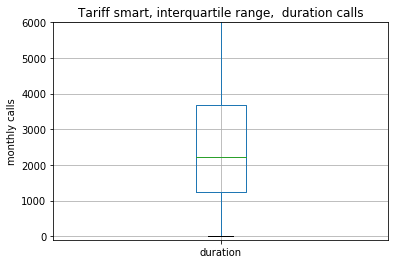

In [71]:
smart_data.boxplot('duration')
plt.ylim(-100, 6000)
plt.ylabel('monthly calls')
plt.title('Tariff smart, interquartile range,  duration calls')
plt.show()

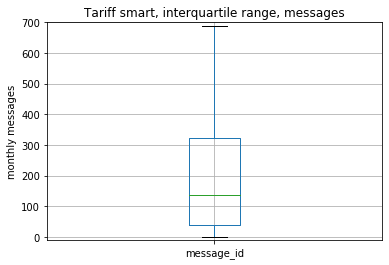

In [72]:
smart_data.boxplot('message_id')
plt.ylim(-10, 700)
plt.ylabel('monthly messages')
plt.title('Tariff smart, interquartile range, messages')
plt.show()

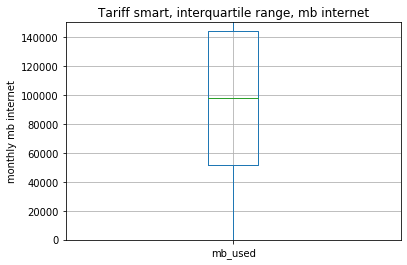

In [73]:
smart_data.boxplot('mb_used')
plt.ylim(-100, 150000)
plt.ylabel('monthly mb internet')
plt.title('Tariff smart, interquartile range, mb internet')
plt.show()

Рассмотрим тариф ультра. Включено 3000 минут , 1000 смс и 30 Гб интернета

Построим гистограммы для трех видов связи

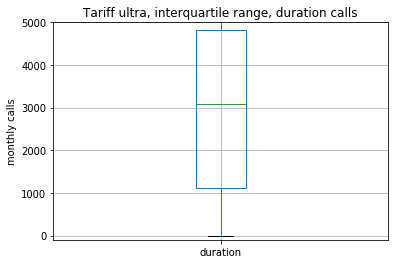

In [74]:
ultra_data.boxplot('duration')
plt.ylim(-100, 5000)
plt.ylabel('monthly calls')
plt.title('Tariff ultra, interquartile range, duration calls')
plt.show()

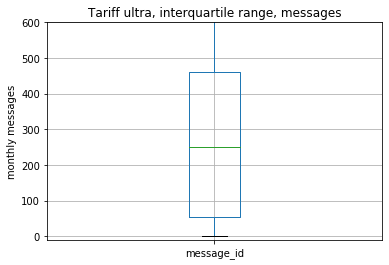

In [75]:
ultra_data.boxplot('message_id')
plt.ylim(-10, 600)
plt.ylabel('monthly messages')
plt.title('Tariff ultra, interquartile range, messages')
plt.show()

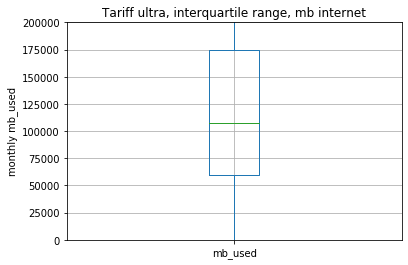

In [76]:
ultra_data.boxplot('mb_used')
plt.ylim(-100, 200000)
plt.ylabel('monthly mb_used')
plt.title('Tariff ultra, interquartile range, mb internet')
plt.show()

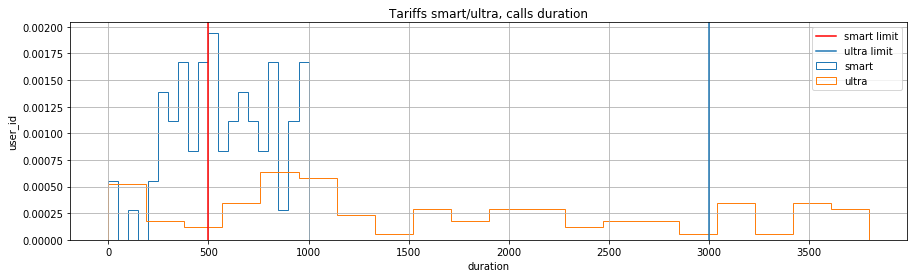

In [77]:
plt.figure(figsize=(15, 4))

smart_data['duration'].hist(bins=20, range = (0, 1000), density=True, label = 'smart', histtype='step')
ultra_data['duration'].hist(bins=20, range = (0, 3800), density=True, label = 'ultra', histtype='step')
plt.xlabel('duration')
plt.ylabel('user_id')
plt.title('Tariffs smart/ultra, calls duration')
plt.axvline(x=500, label='smart limit', color='red')
plt.axvline(x=3000, label='ultra limit')
plt.legend()
plt.show()

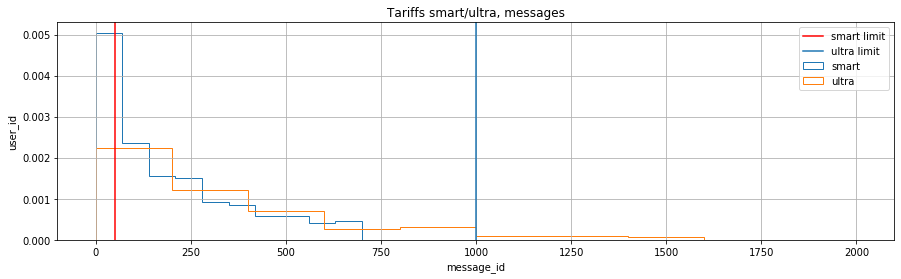

In [78]:
plt.figure(figsize=(15, 4))

smart_data['message_id'].hist(bins=10, range = (0, 700), density=True, label = 'smart', histtype='step')
ultra_data['message_id'].hist(bins=10, range = (0, 2000), density=True, label = 'ultra', histtype='step')
plt.xlabel('message_id')
plt.ylabel('user_id')
plt.title('Tariffs smart/ultra, messages')
plt.axvline(x=50, label='smart limit', color='red')
plt.axvline(x=1000, label='ultra limit')
plt.legend()
plt.show()

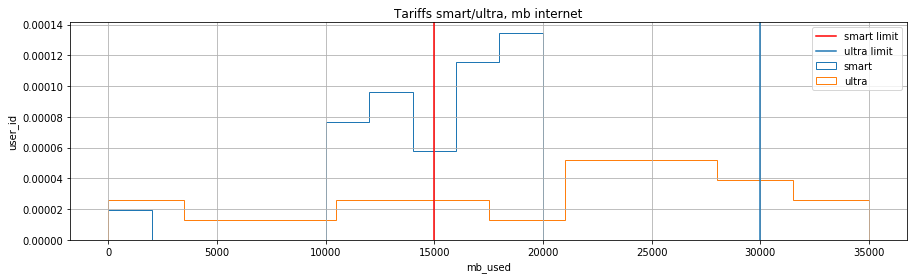

In [79]:
plt.figure(figsize=(15, 4))

smart_data['mb_used'].hist(bins=10, range = (0, 20000), density=True, label = 'smart', histtype='step')
ultra_data['mb_used'].hist(bins=10, range = (0, 35000), density=True, label = 'ultra', histtype='step')
plt.xlabel('mb_used')
plt.ylabel('user_id')
plt.title('Tariffs smart/ultra, mb internet')
plt.axvline(x=15000, label='smart limit', color='red')
plt.axvline(x=30000, label='ultra limit')
plt.legend()
plt.show()

Видим на гистограмме, что пик использования минут разговора приходится на 500 минут,что и указано в лимите тарифа, при этом очень многие намного превышают этот лимит. Большинство пользователей этого тарифа отправляют мало смс и немногие выходят за лимит. Интернет используют по максимуму, большинство  превышает лимит

Видим,что некоторая часть пользователей почти не звонит и тратит около 250 минут, пик приходится на значение около 1000. Основная масса абонентов пишет менее 100 смс. Интернет трафик использую много: пик приходится на 23000-27000 мб, некотрые превышают лимит и используют свыше 30000 мб.

In [80]:
stat = month_data_spent.pivot_table(index = ['tariff'], values = ['duration', 'message_id', 'mb_used'], aggfunc=['mean', 'var', 'std'])

In [81]:
stat

mean                                    var                \
          duration       mb_used message_id      duration       mb_used   
tariff                                                                    
smart   405.760915  16208.386990  33.369058  34103.524266  3.446250e+07   
ultra   510.706085  19468.805208  49.313387  95051.891910  1.017510e+08   

                            std                           
         message_id    duration       mb_used message_id  
tariff                                                    
smart    796.955256  184.671395   5870.476681  28.230396  
ultra   2285.417425  308.304868  10087.170752  47.806040

In [82]:
stat.describe()

mean                                    var                \
         duration       mb_used message_id      duration       mb_used   
count    2.000000      2.000000   2.000000      2.000000  2.000000e+00   
mean   458.233500  17838.596099  41.341223  64577.708088  6.810676e+07   
std     74.207442   2305.463832  11.274343  43097.004063  4.758017e+07   
min    405.760915  16208.386990  33.369058  34103.524266  3.446250e+07   
25%    431.997207  17023.491544  37.355141  49340.616177  5.128463e+07   
50%    458.233500  17838.596099  41.341223  64577.708088  6.810676e+07   
75%    484.469793  18653.700654  45.327305  79814.799999  8.492888e+07   
max    510.706085  19468.805208  49.313387  95051.891910  1.017510e+08   

                           std                           
        message_id    duration       mb_used message_id  
count     2.000000    2.000000      2.000000   2.000000  
mean   1541.186340  246.488132   7978.823717  38.018218  
std    1052.501693   87.422067   2981.652972  13.842070  
min     796.955256  184.671395   5870.476681  28.230396  
25%    1169.070798  215.579764   6924.650199  33.124307  
50%    1541.186340  246.488132   7978.823717  38.018218  
75%    1913.301882  277.396500   9032.997234  42.912129  
max    2285.417425  308.304868  10087.170752  47.806040

#### Общие выводы по распределениям:####

- абоненты смарт почти всегда превышают лимиты, особенно по мегабайтам и минутам 

- абоненты ультра же по звонкам и смс вписываются в тариф, а мо мб превышают

- смс почти не используют пользователи обоих тарифов, либо используют, но около 10-15 смс

- абоненты ультра не исчерпывают полностью лимит по звонкам
 

### Шаг 4. Проверка гипотез###

#### Надо проверить представленные гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Формулировки Н0 и Н1 для первого задания:

H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1 — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Формулировки Н0 и Н1 для второго задания:

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

 В качестве уровня статистической значимости принимается значение 0.05
 
 В данном анализе будем применять t-тест. При этом методе требуется установить фиксированное значение уровня значимости, допустимая для данной задачи вероятность ошибки первого рода, то есть того, что гипотеза на самом деле верна, но будет отвергнута процедурой проверки.Формируем гипотезу Н0, на основе ее формулируем альтернативную гипотезу Н1. И далее проводится анализ, в результате которого делается вывод «данные противоречат нулевой гипотезе при уровне значимости alpha = ' '». Гипотеза отвергается, либо делается вывод «данные не противоречат нулевой гипотезе при уровне значимости alpha = ' '». Гипотеза принимается.

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается ####

In [83]:
# сделаем выборку дохода с пользователей по тарифам по отдельности
smart = all_smart['revenue']
ultra = all_ultra['revenue']



print('cреднее smart: ',pd.Series(smart).mean())
print('cреднее ultra: ',pd.Series(ultra).mean())

alpha = 0.05

results =  st.ttest_ind(
    smart, 
    ultra)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее smart:  1211.740402816704
cреднее ultra:  2057.779801003106
p-значение: 9.425767859599861e-203
Отвергаем нулевую гипотезу


Доход по двум тарифам сильно различается. Только проверяя гипотезы я не могу точно сказать какой тариф приносит больше выручки, но могу сказать, что оно сильно отличается. Из-за двухсторонности гипотезы нельзя понять в какую сторону.  Но я посчитала среднее количество выручки для обоих тарифов и могу сделать вывод, что cредняя выручка из тарифа Ultra выше. Думаю, что это потому, что тариф ультра существенно дороже смарт, и пользователи ультра еще и дополнительно платят за сверх трафик интернета, поэтому не удивительно, что доход выше.

#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов####

In [84]:
moscow = month_data_spent[(month_data_spent['city'] == 'Москва')]

In [85]:
other_city = month_data_spent[(month_data_spent['city'] != 'Москва')]

In [86]:
moscow_rev = moscow['revenue']
other_city_rev = other_city['revenue']



print('cреднее москва: ',pd.Series(moscow_rev).mean())
print('cреднее другие города: ',pd.Series(other_city_rev).mean())

alpha = 0.05

results =  st.ttest_ind(
    moscow_rev, 
    other_city_rev)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


cреднее москва:  1493.7984673562808
cреднее другие города:  1465.8123295645394
p-значение: 0.4253161642362022
Не получилось отвергнуть нулевую гипотезу


Видим, что выручка по Москве и других регионам почти не различается.Как и в предыдущем задании, только проверяя гипотезы я не могу точно сказать какой тариф приносит больше выручки, но могу сказать, что оно сильно отличается. Из-за двухсторонности гипотезы нельзя понять в какую сторону. Но я посчитала среднее количество выручки для Москвы (1502) и других регионов(1475), могу сделать вывод, что не сильно эти значения отличаются.

### Вывод ##

В данном проекте было дано несколько исходных датасетов с данными о тарифах, пользователях, их звонках, смс и трафике. 
Я решила сгруппировать данные из разных таблиц по удобному принципу рассмотрения, изменила типы данных. Выделила данные пользователей за месяц, сколько чего они тратят. Посчитала, есть ли у них перерасход по пакетам, если он есть, то умножала его на цену за единицу. И посчитала, сколько всего компания получает дохода с клиента, суммировав все их перерасходы по всем видам связи и базовую плату за тариф, все это сохранила в соответствующем столбце и добавила к таблице.

Далее выделила кол-во звонков, минут,смс и мб интернета по месяцам, посчитала помесячную выручку с каждого пользователя.

Построили гистограммы использования минут, смс и интернета для каждого тарифа в отдельности. Сделали выводы: 

- абоненты смарт почти всегда превышают лимиты, особенно по мегабайтам и минутам

- абоненты ультра же по звонкам и смс вписываются в тариф, а мо мб превышают

- смс почти не используют пользователи обоих тарифов, либо используют, но около 10-15 смс

- абоненты ультра не исчерпывают полностью лимит по звонкам


Потом проверяли гипотезы:

Гипотеза : Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Сделали вывод, что cредняя выручка из тарифа Ultra выше.

Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Получилось, что среднее количество выручки для Москвы (1502) и других регионов(1475), поэтому могу сделать вывод, что не сильно эти значения отличаются.